本篇用来测试浮点转定点`float2fxp_s module`的功能正确性

In [1]:
#软件生成的原始测试文件，包含了一系列16进制表示的FP32测试数据，高位在左，低位在右（因为符合readmem的要求）
origin_target = '/home/superior/AutoEncoder_FPGA/output/tmp/float2fxp_test.hex'
#随后测试数据输入到硬件，硬件通过readmem和writemem完成仿真读取和记录
#硬件输出的定点数FXP[9,7]的数据
verify_target = '/home/superior/AutoEncoder_FPGA/output/tmp/float2fxp_verify.hex'
#输入数据的范围和测试的size
number_min = -10;
number_max = 10;
test_size  = 256;

In [2]:
import struct
import random
origin_lst =[]
with open(origin_target,"w") as file:
    for _ in range(256):
        a = random.uniform(number_min,number_max)
        a_bytes = struct.pack('!f',a)#大端格式 
        a_hex   = a_bytes.hex()
        origin_lst.append((a,a_hex))
        file.write(f"{a_hex}  //{a}\n")

数据准备完毕，去vivado软件中运行仿真

vivado仿真完毕，读取仿真结果并分析

In [3]:
print("-"*65)
print(f"\33[1;7;32m|{'fp32':^20}|{'fp32(hex)':^15}|{'fxp':^12}|{'fxp(hex)':^15}|\33[0m")
print(f"|{'':^20}|{'MSB':<7}{'LSB':>8}|{'':^12}|{'MSB':<7}{'LSB':>8}|")
print("-"*65)
from fixedpoint import FixedPoint
with open(verify_target,"r") as file:
    for i in range(256):
        b_str = file.readline().strip()
        b_obj = FixedPoint('0x'+b_str,signed=True,m=9,n=7,str_base=16,overflow='clamp',overflow_alert='warning')
        print(f"\33[37;1m|{origin_lst[i][0]:>20}|{origin_lst[i][1]:>15}|{float(b_obj):>12}|{b_str:>15}|\33[0m")

-----------------------------------------------------------------
|        fp32        |   fp32(hex)   |    fxp     |   fxp(hex)    |
|                    |MSB         LSB|            |MSB         LSB|
-----------------------------------------------------------------
|   1.268727921619849|       3fa265ad|    1.265625|           00a2|
| -0.9083350156236829|       bf6888a5|    -0.90625|           ff8c|
|   5.221342419302635|       40a7153d|     5.21875|           029c|
|  -8.611482286948245|       c109c8a2|   -8.609375|           fbb2|
|   -3.26167070440182|       c050bf36|  -3.2578125|           fe5f|
|   9.959306801747733|       411f5952|    9.953125|           04fa|
|   -7.51996526678314|       c0f0a38e|   -7.515625|           fc3e|
|    4.11556734101964|       4083b2ba|    4.109375|           020e|
|   7.317954795647982|       40ea2cb0|      7.3125|           03a8|
|  5.4582536027357005|       40aeaa03|    5.453125|           02ba|
| -5.1333574850482355|       c0a44477|  -5.1328125| 

在vivado软件中也可以设置浮点数和定点数进行观察分析
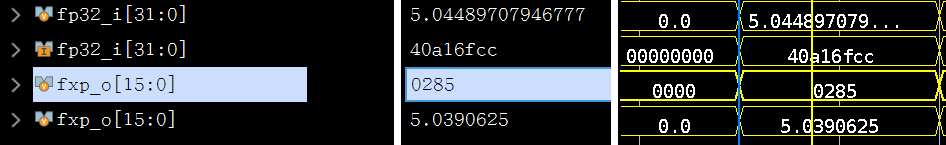  